## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_mouse_data_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID') 

# Display the data table for preview
mouse_df = combine_mouse_data_df.rename(columns={'Tumor Volume (mm3)': 'Tumor_volume'}) 
mouse_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
number_of_mouse_count = mouse_df["Mouse ID"].count()
number_of_mouse_count

1893

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
rows_duplicated = mouse_df[mouse_df.duplicated(['Mouse ID', 'Timepoint'])]
rows_duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Before dropping all duplicate rows I have to check and get all duplicate rows for Mouse ID
duplicate_rows_for_mouseID = mouse_df[mouse_df.duplicated(['Mouse ID',])]
duplicate_rows_for_mouseID 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Drop any duplicate rows to get a good dataframe by using the Mouse ID 
good_df = mouse_df.drop_duplicates("Mouse ID")
good_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

reg_mean = mouse_df.groupby('Drug Regimen')['Tumor_volume'].mean()

reg_median = mouse_df.groupby('Drug Regimen')['Tumor_volume'].median()

reg_variance = mouse_df.groupby('Drug Regimen')['Tumor_volume'].var()

reg_standard_dv = mouse_df.groupby('Drug Regimen')['Tumor_volume'].std()

reg_sem = mouse_df.groupby('Drug Regimen')['Tumor_volume'].sem()

summary_stats_df = pd.DataFrame({"Mean": reg_mean, "Median": reg_median, "Variance": reg_variance, "Standard Deviation": reg_standard_dv, "SEM": reg_sem})
summary_stats_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [7]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.

# There should be a single bar per regimen

drug_reg_data = pd.DataFrame(mouse_df.groupby(["Drug Regimen"]).count()).reset_index()

# Change dataframe to two columns
drugs_reg_df = drug_reg_data[["Drug Regimen", "Mouse ID"]]

drugs_reg_df = drugs_reg_df.set_index("Drug Regimen")

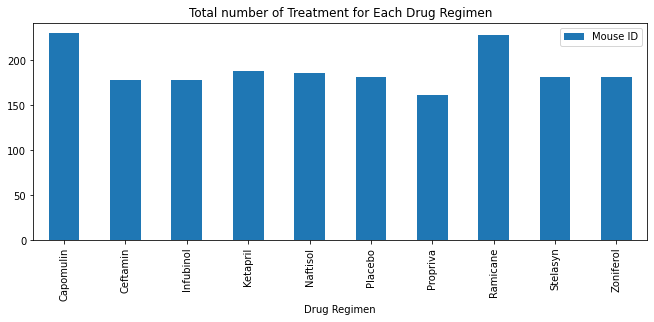

<Figure size 432x288 with 0 Axes>

In [8]:
#Creating the bar chart
drugs_reg_df.plot(kind="bar", figsize=(11,4))

plt.title("Total number of Treatment for Each Drug Regimen")
plt.show()
plt.tight_layout()

In [9]:
# Generate identical bar plot using pyplot instead of pandas.
list_of_drugs = summary_stats_df.index.tolist()
list_of_drugs

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [10]:
# Creating a list of drug_count 
count_of_drugs = (mouse_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
count_of_drugs

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [11]:
x_axis = np.arange(len(count_of_drugs))

Text(0, 0.5, 'Count')

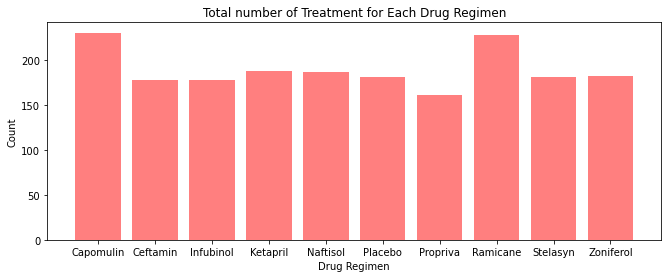

In [12]:
# Adding value to x-axis
x_axis = list_of_drugs

# Creating the  bar chart
plt.figure(figsize=(11,4))
plt.bar(x_axis, count_of_drugs, color='r', alpha=0.5, align="center")

plt.title("Total number of Treatment for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_df = pd.DataFrame(mouse_df.groupby(["Sex"]).count()).reset_index()
mice_gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [14]:
# Modify dataframe to two columns
mice_gender_df = mice_gender_df[["Sex","Mouse ID"]]
mice_gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

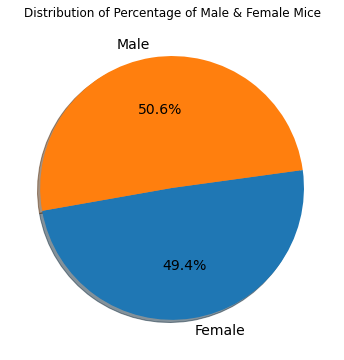

In [16]:
plt.figure(figsize=(13,8))
xaxis = plt.subplot(121, aspect="equal")
mice_gender_df.plot(kind="pie", y = "Mouse ID", ax=xaxis, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=mice_gender_df["Sex"], legend = False, fontsize=14)

plt.title("Distribution of Percentage of Male & Female Mice")
plt.xlabel("")
plt.ylabel("")

In [19]:
# Generate identical pie plot using pyplot
mice_gender_count = (mouse_df.groupby(["Sex"])["Age_months"].count()).tolist()
mice_gender_count

[935, 958]

In [20]:
# Placing specific values to the pie chart
labels = ["Females", "Males"]
colors = ["orange", "blue"]
explode = (0.1, 0)

(-1.168554778187085,
 1.1046347624021708,
 -1.2267182048220846,
 1.1096662105117718)

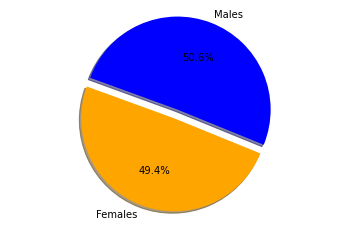

In [21]:
 # creating the pie chart
plt.pie(mice_gender_count,explode=explode, labels=labels, colors=colors, autopct="%3.1f%%", shadow=True, startangle=160)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Collecting and arranging columns of  "Drug Regimen", "Mouse ID" and "Timepoint"
arrange_df = mouse_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
final_df = arrange_df.loc[arrange_df["Timepoint"] == 45]
final_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [24]:
 # Collecting data from "Capomulin" and reset index
capomulin_df = final_df[final_df["Drug Regimen"].isin(["Capomulin"])]
capomulin_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [25]:
 # Change column "Tumor_volume " a dataframe object
capomulin_obj = capomulin_df.sort_values(["Tumor_volume"], ascending=True).reset_index()
capomulin_obj = capomulin_obj["Tumor_volume"]
capomulin_obj

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor_volume, dtype: float64

Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [27]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# If the data is in a dataframe, we use pandas to give quartile calculations

quartiles = capomulin_obj.quantile([.25,.5,.75])
lower_quartiles = quartiles[0.25]
upper_quartiles = quartiles[0.75]
inter_quartile_range = upper_quartiles - lower_quartiles

print(f"The lower quartile of temperatures is: {lower_quartiles}")
print(f"The upper quartile of temperatures is: {upper_quartiles}")
print(f"The interquartile range of temperatures is: {inter_quartile_range}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lower_quartiles - (1.5*inter_quartile_range)
upper_bound = upper_quartiles + (1.5*inter_quartile_range)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [ ]:


# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights